#### Imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

#### Reading Data

In [24]:
df = pd.read_csv('2- Dataset/Ames_Housing_Data.csv')
df.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


#### Finding Outliers

In [25]:
numeric_df = df.select_dtypes(include=['number'])
correlations = numeric_df.corr()['SalePrice'].sort_values(ascending=False)
print(correlations)

SalePrice          1.000000
Overall Qual       0.799262
Gr Liv Area        0.706780
Garage Cars        0.647877
Garage Area        0.640401
Total Bsmt SF      0.632280
1st Flr SF         0.621676
Year Built         0.558426
Full Bath          0.545604
Year Remod/Add     0.532974
Garage Yr Blt      0.526965
Mas Vnr Area       0.508285
TotRms AbvGrd      0.495474
Fireplaces         0.474558
BsmtFin SF 1       0.432914
Lot Frontage       0.357318
Wood Deck SF       0.327143
Open Porch SF      0.312951
Half Bath          0.285056
Bsmt Full Bath     0.276050
2nd Flr SF         0.269373
Lot Area           0.266549
Bsmt Unf SF        0.182855
Bedroom AbvGr      0.143913
Screen Porch       0.112151
Pool Area          0.068403
Mo Sold            0.035259
3Ssn Porch         0.032225
BsmtFin SF 2       0.005891
Misc Val          -0.015691
Yr Sold           -0.030569
Bsmt Half Bath    -0.035835
Low Qual Fin SF   -0.037660
MS SubClass       -0.085092
Overall Cond      -0.101697
Kitchen AbvGr     -0

<Axes: xlabel='Overall Qual', ylabel='SalePrice'>

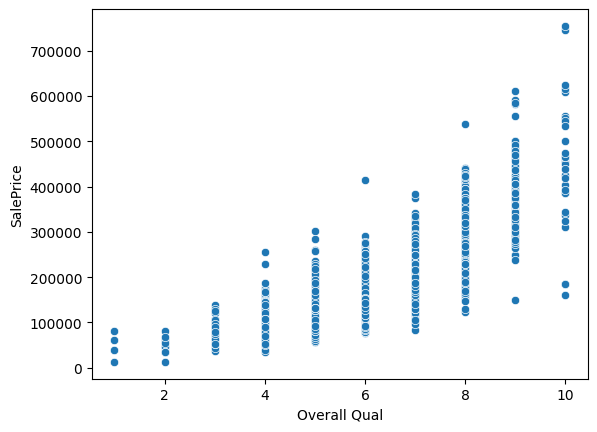

In [26]:
sb.scatterplot(x='Overall Qual', y='SalePrice', data=df)

<Axes: xlabel='Gr Liv Area', ylabel='SalePrice'>

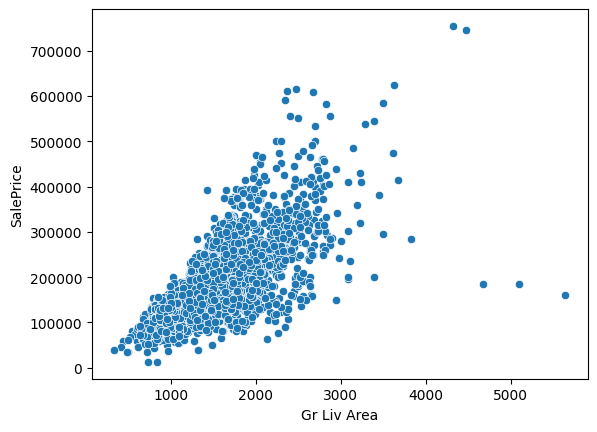

In [ ]:
sb.scatterplot(x='Gr Liv Area', y='SalePrice', data=df)

In [ ]:
first_Outliers = df[(df['Overall Qual']>8) & (df['SalePrice']<200000)].index
second_Outliers = df[(df['Gr Liv Area']>4500) & (df['SalePrice']<200000)].index

Outliers = set(list(first_Outliers) + list(second_Outliers))
for i in Outliers:
    df = df.drop(index=i)

<Axes: xlabel='Overall Qual', ylabel='SalePrice'>

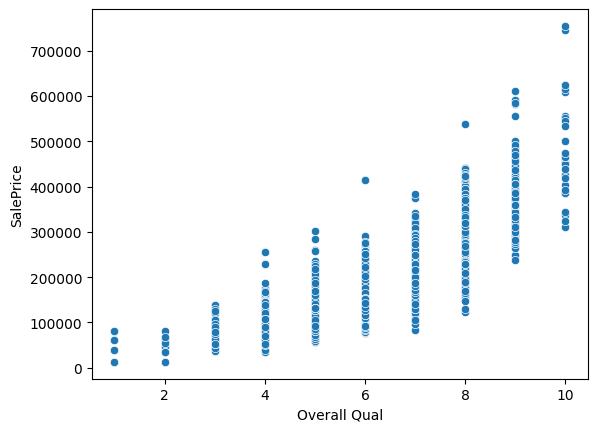

In [29]:
sb.scatterplot(x='Overall Qual', y='SalePrice', data=df)

<Axes: xlabel='Gr Liv Area', ylabel='SalePrice'>

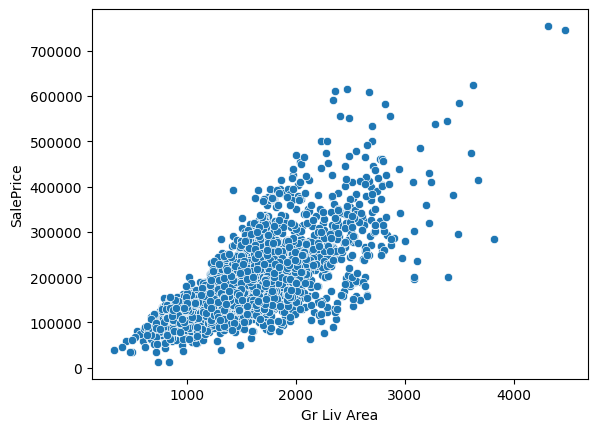

In [ ]:
sb.scatterplot(x='Gr Liv Area', y='SalePrice', data=df)

#### Removing null values

In [31]:
# Droping unusable columns
df = df.drop('PID',axis='columns')

In [32]:
def percent_missing(df):
    percent_nan = 100 * df.isnull().sum() / len(df)
    percent_nan = percent_nan[percent_nan > 0].sort_values()

    return percent_nan

percent_nan = percent_missing(df)
percent_nan

Electrical         0.034176
Garage Cars        0.034176
BsmtFin SF 1       0.034176
Garage Area        0.034176
BsmtFin SF 2       0.034176
Bsmt Unf SF        0.034176
Total Bsmt SF      0.034176
Bsmt Half Bath     0.068353
Bsmt Full Bath     0.068353
Mas Vnr Area       0.786056
Bsmt Qual          2.734108
Bsmt Cond          2.734108
BsmtFin Type 1     2.734108
BsmtFin Type 2     2.768284
Bsmt Exposure      2.836637
Garage Type        5.365687
Garage Qual        5.434040
Garage Cond        5.434040
Garage Yr Blt      5.434040
Garage Finish      5.434040
Lot Frontage      16.712235
Fireplace Qu      48.598770
Mas Vnr Type      60.663021
Fence             80.451128
Alley             93.233083
Misc Feature      96.411483
Pool QC           99.589884
dtype: float64

In [33]:
# Dealing with null columns for under 1 percent:

# percent_nan[percent_nan < 1]
# Output:

# Electrical         0.034176
# Garage Cars        0.034176
# BsmtFin SF 1       0.034176
# Garage Area        0.034176
# BsmtFin SF 2       0.034176
# Bsmt Unf SF        0.034176
# Total Bsmt SF      0.034176
# Bsmt Half Bath     0.068353
# Bsmt Full Bath     0.068353
# Mas Vnr Area       0.786056

# Removing null values for colums with only one null rows:

# 100/len(df)
# Output:
# 0.034176
df = df.dropna(axis=0,subset=['Electrical', 'Garage Cars'])

# Reading the file : Ames_Housing_Feature_Description.txt to know about Basement values

# Basement related numerical null colums:
Bsmt_num_null_columns = ['BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF',
                          'Total Bsmt SF', 'Bsmt Half Bath', 'Bsmt Full Bath']
df[Bsmt_num_null_columns] = df[Bsmt_num_null_columns].fillna(0)

# Basement related string null colums:
Bsmt_str_null_columns = ['Bsmt Qual', 'Bsmt Cond', 'BsmtFin Type 1', 'BsmtFin Type 2', 'Bsmt Exposure']
df[Bsmt_str_null_columns] = df[Bsmt_str_null_columns].fillna('None')

# Masonry related numerical null colums:
df['Mas Vnr Area'] = df['Mas Vnr Area'].fillna(0)

# Masonry related string null colums:
df['Mas Vnr Type'] = df['Mas Vnr Type'].fillna('None')

In [34]:
percent_nan = percent_missing(df)
percent_nan

Garage Type       5.369357
Garage Yr Blt     5.403557
Garage Finish     5.403557
Garage Qual       5.403557
Garage Cond       5.403557
Lot Frontage     16.723666
Fireplace Qu     48.563611
Fence            80.471956
Alley            93.228454
Misc Feature     96.409029
Pool QC          99.589603
dtype: float64

In [35]:
# Dealing with null columns for above 1 percent:




# Reading the file : Ames_Housing_Feature_Description.txt to know about Garage

# Garage related numerical null colums:
Grg_num_null_columns = ['Garage Yr Blt']
df[Grg_num_null_columns] = df[Grg_num_null_columns].fillna(0)

# Garage related string null colums:
Grg_str_null_columns = ['Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond']
df[Grg_str_null_columns] = df[Grg_str_null_columns].fillna('None')




# Above 80% -> Drop
df = df.drop(['Fence', 'Misc Feature', 'Pool QC', 'Alley'], axis='columns')




# Reading the file : Ames_Housing_Feature_Description.txt to know about FirePlace Qu

# Fireplace related string null colums:
df['Fireplace Qu'] = df['Fireplace Qu'].fillna('None')





# LotFrontage: Linear feet of street connected to property

df['Lot Frontage'] = df.groupby('Neighborhood')['Lot Frontage'].transform(lambda value: value.fillna(value.mean()))
df['Lot Frontage'] = df['Lot Frontage'].fillna(0)

percent_nan = percent_missing(df)
percent_nan

Series([], dtype: float64)

#### Dealing With Strings

In [36]:
# This should be str:
df['MS SubClass'] = df['MS SubClass'].apply(str)

# Seperating strings from numbers
object_df = df.select_dtypes(include='object')
numeric_df = df.select_dtypes(exclude='object')

# Converting strings to 0,1 numbers
df_objects_dummies = pd.get_dummies(object_df, drop_first=True, dtype='int')

# Combining seperated dataframes:
df = pd.concat([numeric_df, df_objects_dummies], axis='columns')

#### Train/Test Split


In [37]:
from sklearn.model_selection import train_test_split
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

#### Standardization

In [38]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### Defining Model

In [39]:
from sklearn.linear_model import ElasticNet
base_elastic_net_model = ElasticNet(max_iter=1000000)
param_grid = {
    'alpha' : [0.1, 1, 5, 10, 100],
    'l1_ratio' : [0.1, 0.7, 0.99, 1]
                }
from sklearn.model_selection import GridSearchCV
grid_model = GridSearchCV(
    estimator = base_elastic_net_model,
    param_grid = param_grid,
    scoring = 'neg_mean_squared_error',
    cv = 5,
)

#### Fitting

In [40]:
grid_model.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=ElasticNet(max_iter=1000000),
             param_grid={'alpha': [0.1, 1, 5, 10, 100],
                         'l1_ratio': [0.1, 0.7, 0.99, 1]},
             scoring='neg_mean_squared_error')

#### Best Parameters

In [41]:
grid_model.best_estimator_

ElasticNet(alpha=100, l1_ratio=1, max_iter=1000000)

#### Computing error

In [65]:
y_final = grid_model.predict(X_test)

from sklearn.metrics import  mean_absolute_error, mean_squared_error
MAE = mean_absolute_error(y_test,y_final)
MSE = mean_squared_error(y_test,y_final)
RMSE = np.sqrt(MSE)
model_error = np.round(np.mean(df['SalePrice'])/RMSE, decimals=1)
print(f'Mean squared error is {MSE}')
print(f'Mean absolute error is {MSE}')
print(f'The root of mean squared error is {RMSE}')
print(f'The model error is {model_error}%')

Mean squared error is 433607771.69482297
Mean absolute error is 433607771.69482297
The root of mean squared error is 20823.250747537546
The model error is 8.7%
